In [1]:

#import necessary packages
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
#from pandas_datareader import data
import fix_yahoo_finance as yf
'''#download Apple price data into DataFrame
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (apple.index[-1] - apple.index[0]).days
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")
'''
 

'#download Apple price data into DataFrame\napple = data.DataReader(\'AAPL\', \'yahoo\',start=\'1/1/2000\')\n\n#calculate the compound annual growth rate (CAGR) which \n#will give us our mean return input (mu) \ndays = (apple.index[-1] - apple.index[0]).days\ncagr = ((((apple[\'Adj Close\'][-1]) / apple[\'Adj Close\'][1])) ** (365.0/days)) - 1\nprint (\'CAGR =\',str(round(cagr,4)*100)+"%")\nmu = cagr\n\n#create a series of percentage returns and calculate \n#the annual volatility of returns\napple[\'Returns\'] = apple[\'Adj Close\'].pct_change()\nvol = apple[\'Returns\'].std()*sqrt(252)\nprint ("Annual Volatility =",str(round(vol,4)*100)+"%")\n'

In [ ]:
#ticker = "NFLX"
#date_now = datetime.datetime.now().date()
#df = yf.download([ticker],start="2000-01-01")#, start=date_now)#['Adj Close']
#price =pd.DataFrame(df["Adj Close"].tolist())#[0]
#df=df["Adj Close"]
### retornos:
#returns=df.pct_change()
#returns.plot()
## retorno acumulado
#cum_returns = (1 + df.pct_change()).cumprod()
#cum_returns.plot()
## retorno anual
#annual_return=df.asfreq('BY').pct_change()
#annual_return.plot()

# Generar trayectorias para dos instrumentos

In [2]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.09 #Return
vol = 0.16 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list2 = [S]
 
for x in daily_returns:
    price_list2.append(price_list2[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
#plt.plot(daily_returns)
#plt.show()
#plt.plot(price_list2)
#plt.show()
#plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
#plt.show()

In [3]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.04 #Return
vol = 0.01 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list1 = [S]
 
for x in daily_returns:
    price_list1.append(price_list1[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
#plt.plot(daily_returns)
#plt.show()
#plt.plot(price_list1)
#plt.show()
#plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
#plt.show()

In [115]:
def get_return(df):
    df1=df.pct_change()
    return df1

def get_return_cum(df):
    returns=get_return(df)
    cum_returns = (1 + returns).cumprod()
    return cum_returns

def get_return_annual(df):
    annual_return_=df.asfreq('BY').pct_change() # BY: Business year
    return annual_return_
    
def get_roll_drawdown(df):
    Roll_Max = pd.DataFrame(df.values-np.maximum.accumulate(df.values))
    Roll_Max.index=df.index
    Roll_Max.columns=df.columns
    return Roll_Max

In [116]:
idx=pd.date_range('2000-01-01', '2018-07-19', freq="B")

instrument_A=pd.DataFrame(price_list1)#.plot()
instrument_A.columns=["A"]
instrument_A.index=idx[:len(instrument_A)]
returns_A=get_return(instrument_A)
cum_returns_A = get_return_cum(instrument_A)
annual_ret_A=get_return_annual(instrument_A)
Roll_Max_A=get_roll_drawdown(instrument_A)

instrument_B=pd.DataFrame(price_list2)#.plot()
instrument_B.columns=["B"]
instrument_B.index=idx[:len(instrument_B)]
returns_B=get_return(instrument_B)
cum_returns_B = get_return_cum(instrument_B)
annual_ret_B=get_return_annual(instrument_B)
Roll_Max_B=get_roll_drawdown(instrument_B)


In [118]:
#Roll_Max_A

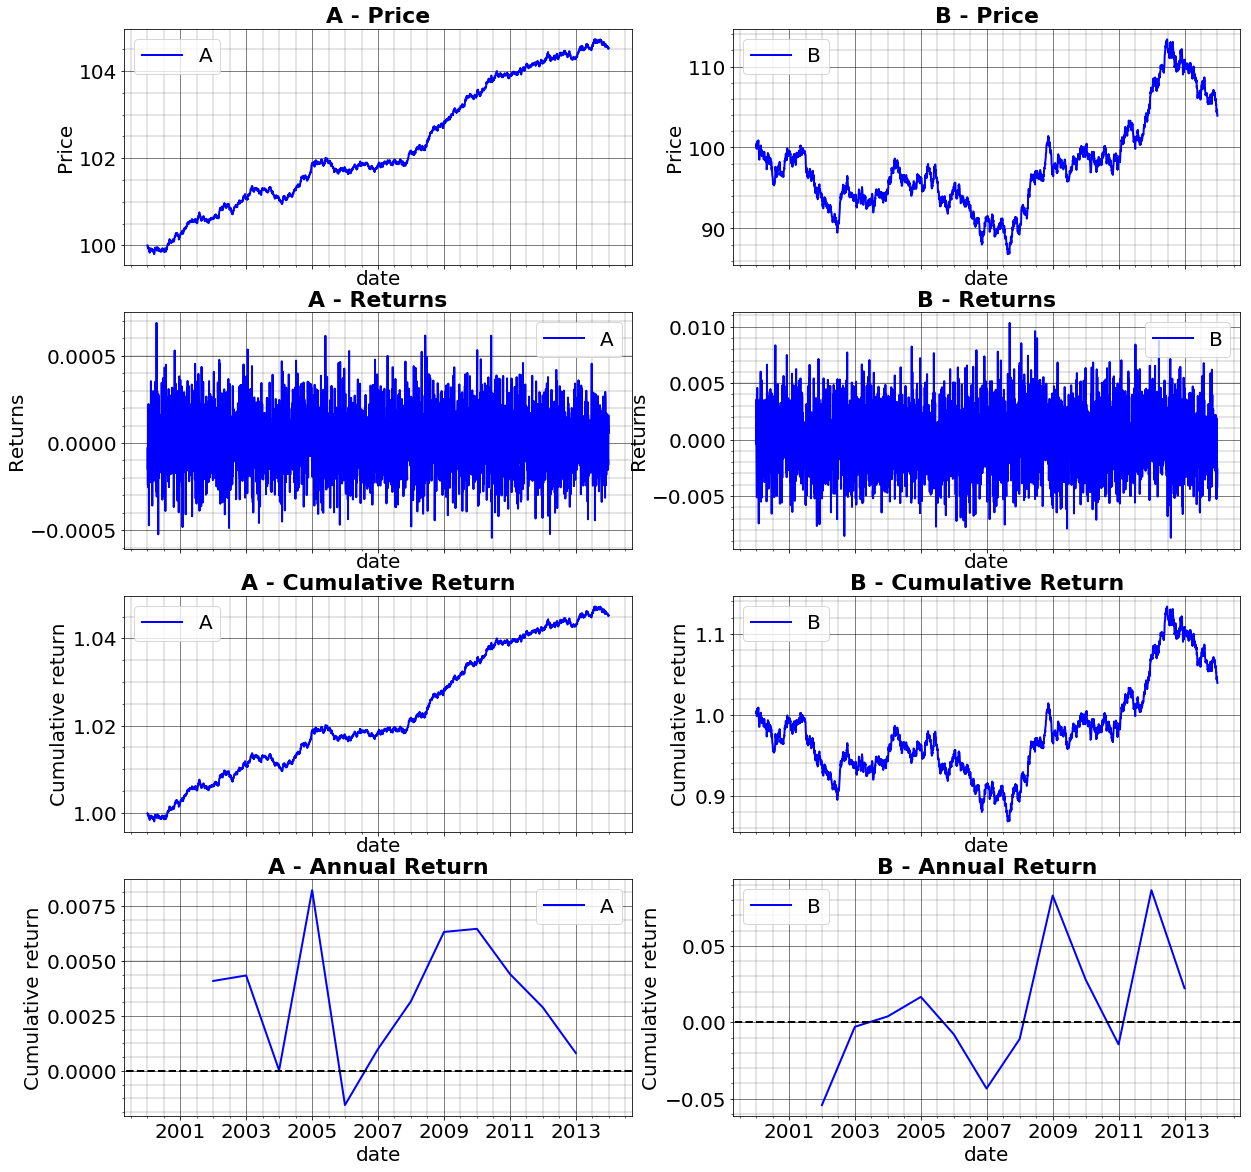

In [39]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3,ax4) = plt.subplots(4,2, sharex=True, figsize=(20,20))
#f.suptitle(ticker+' : '+str(date_now),y=1.05, fontsize=25) #  "2018 - 07 - 11"

ax1[0].plot(instrument_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[0].set_xlabel('date' ,fontsize=20)
ax1[0].set_ylabel('Price' ,fontsize=20)
ax1[0].set_title( instrument_A.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[0].tick_params(labelsize = 20)
ax1[0].legend( fontsize=20,loc='best')#shadow=True,
ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[0].minorticks_on()

ax1[1].plot(instrument_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[1].set_xlabel('date' ,fontsize=20)
ax1[1].set_ylabel('Price' ,fontsize=20)
ax1[1].set_title( instrument_B.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[1].tick_params(labelsize = 20)
ax1[1].legend( fontsize=20,loc='best')#shadow=True,
ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[1].minorticks_on()

ax2[0].plot(returns_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[0].set_xlabel('date' ,fontsize=20)
ax2[0].set_ylabel('Returns' ,fontsize=20)
ax2[0].set_title( returns_A.columns[0]+' - Returns',fontsize=22, fontweight='bold')
ax2[0].tick_params(labelsize = 20)
ax2[0].legend( fontsize=20,loc='best')#shadow=True,
ax2[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[0].minorticks_on()

ax2[1].plot(returns_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[1].set_xlabel('date' ,fontsize=20)
ax2[1].set_ylabel('Returns' ,fontsize=20)
ax2[1].set_title( returns_B.columns[0]+' - Returns',fontsize=22, fontweight='bold')
ax2[1].tick_params(labelsize = 20)
ax2[1].legend( fontsize=20,loc='best')#shadow=True,
ax2[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[1].minorticks_on()

ax3[0].plot(cum_returns_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[0].set_xlabel('date' ,fontsize=20)
ax3[0].set_ylabel('Cumulative return' ,fontsize=20)
ax3[0].set_title( cum_returns_A.columns[0]+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[0].tick_params(labelsize = 20)
ax3[0].legend( fontsize=20,loc='best')#shadow=True,
ax3[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[0].minorticks_on()

ax3[1].plot(cum_returns_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[1].set_xlabel('date' ,fontsize=20)
ax3[1].set_ylabel('Cumulative return' ,fontsize=20)
ax3[1].set_title( cum_returns_B.columns[0]+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[1].tick_params(labelsize = 20)
ax3[1].legend( fontsize=20,loc='best')#shadow=True,
ax3[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[1].minorticks_on()

ax4[0].plot(annual_ret_A,color="b",label="A",lw=2)#import matplotlib as mpl
ax4[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[0].set_xlabel('date' ,fontsize=20)
ax4[0].set_ylabel('Cumulative return' ,fontsize=20)
ax4[0].set_title( annual_ret_A.columns[0]+' - Annual Return',fontsize=22, fontweight='bold')
ax4[0].tick_params(labelsize = 20)
ax4[0].legend( fontsize=20,loc='best')#shadow=True,
ax4[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[0].minorticks_on()

ax4[1].plot(annual_ret_B,color="b",label="B",lw=2)#import matplotlib as mpl
ax4[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[1].set_xlabel('date' ,fontsize=20)
ax4[1].set_ylabel('Cumulative return' ,fontsize=20)
ax4[1].set_title(annual_ret_B.columns[0]+' - Annual Return',fontsize=22, fontweight='bold')
ax4[1].tick_params(labelsize = 20)
ax4[1].legend( fontsize=20,loc='best')#shadow=True,
ax4[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[1].minorticks_on()

In [ ]:
#cum_returns_A

# PORTAFOLIO

In [272]:
I=1000 # Capital
w_a=.9 # weight A
w_b=round(1-w_a,2)

In [286]:
## suponiendo reebalnaceo diario de inversion inicial de 1000 con w_a y w_b

prices=pd.concat([instrument_A,instrument_B],axis=1)
prices.columns=["A_price","B_price"]
prices.head()
aux=get_return(prices)#pd.DataFrame(prices.pct_change())#()
#aux.colums=["A_returns","B_returns"]
aux1=get_return_cum(prices)#pd.DataFrame((prices.pct_change()+1).cumprod())#(prices.pct_change()+1).cumprod())
aux2=get_return_annual(prices)
aux3=get_roll_drawdown(prices)
prices=pd.concat([prices,aux,aux1,aux3],axis=1)
prices=pd.merge(prices,aux2,left_index=True,right_index=True,how="left")
prices.columns=["A_price","B_price","A_returns","B_returns","A_cum_return","B_cum_return",
               "A_maxd","B_maxd","A_ann_return","B_ann_return"]
prices["A_wa"]=prices["A_cum_return"]*w_a
prices["B_wb"]=prices["B_cum_return"]*w_b
prices["Portfolio_evolution"]=(prices["A_wa"]+prices["B_wb"])*I
portfolio=pd.DataFrame(prices_filter["I_Awa_Bwb"])
portfolio.columns=["Portfolio"]

prices["Port_returns"]=get_return(portfolio)
prices["Port_cum_return"]= get_return_cum(portfolio)
prices["Port_ann_return"]=get_return_annual(portfolio)
prices["Port_maxd"]=get_roll_drawdown(portfolio.dropna())
prices.head()

,A_price,B_price,A_returns,B_returns,A_cum_return,B_cum_return,A_maxd,B_maxd,A_ann_return,B_ann_return,A_wa,B_wb,Portfolio_evolution,Port_returns,Port_cum_return,Port_ann_return,Port_maxd
2000-01-03,100.000000,100.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,99.985215,100.176182,-0.000148,0.001762,0.999852,1.001762,-0.014785,0.000000,NaN,NaN,0.899867,0.100176,1000.043116,NaN,NaN,NaN,0.000000
2000-01-05,99.982593,100.133110,-0.000026,-0.000430,0.999826,1.001331,-0.017407,-0.043072,NaN,NaN,0.899843,0.100133,999.976446,-0.000067,0.999933,NaN,-0.066670
2000-01-06,99.959415,100.489471,-0.000232,0.003559,0.999594,1.004895,-0.040585,0.000000,NaN,NaN,0.899635,0.100489,1000.124209,0.000148,1.000081,NaN,0.000000
2000-01-07,99.935365,100.336885,-0.000241,-0.001518,0.999354,1.003369,-0.064635,-0.152586,NaN,NaN,0.899418,0.100337,999.755174,-0.000369,0.999712,NaN,-0.369034


In [270]:
#port.head()

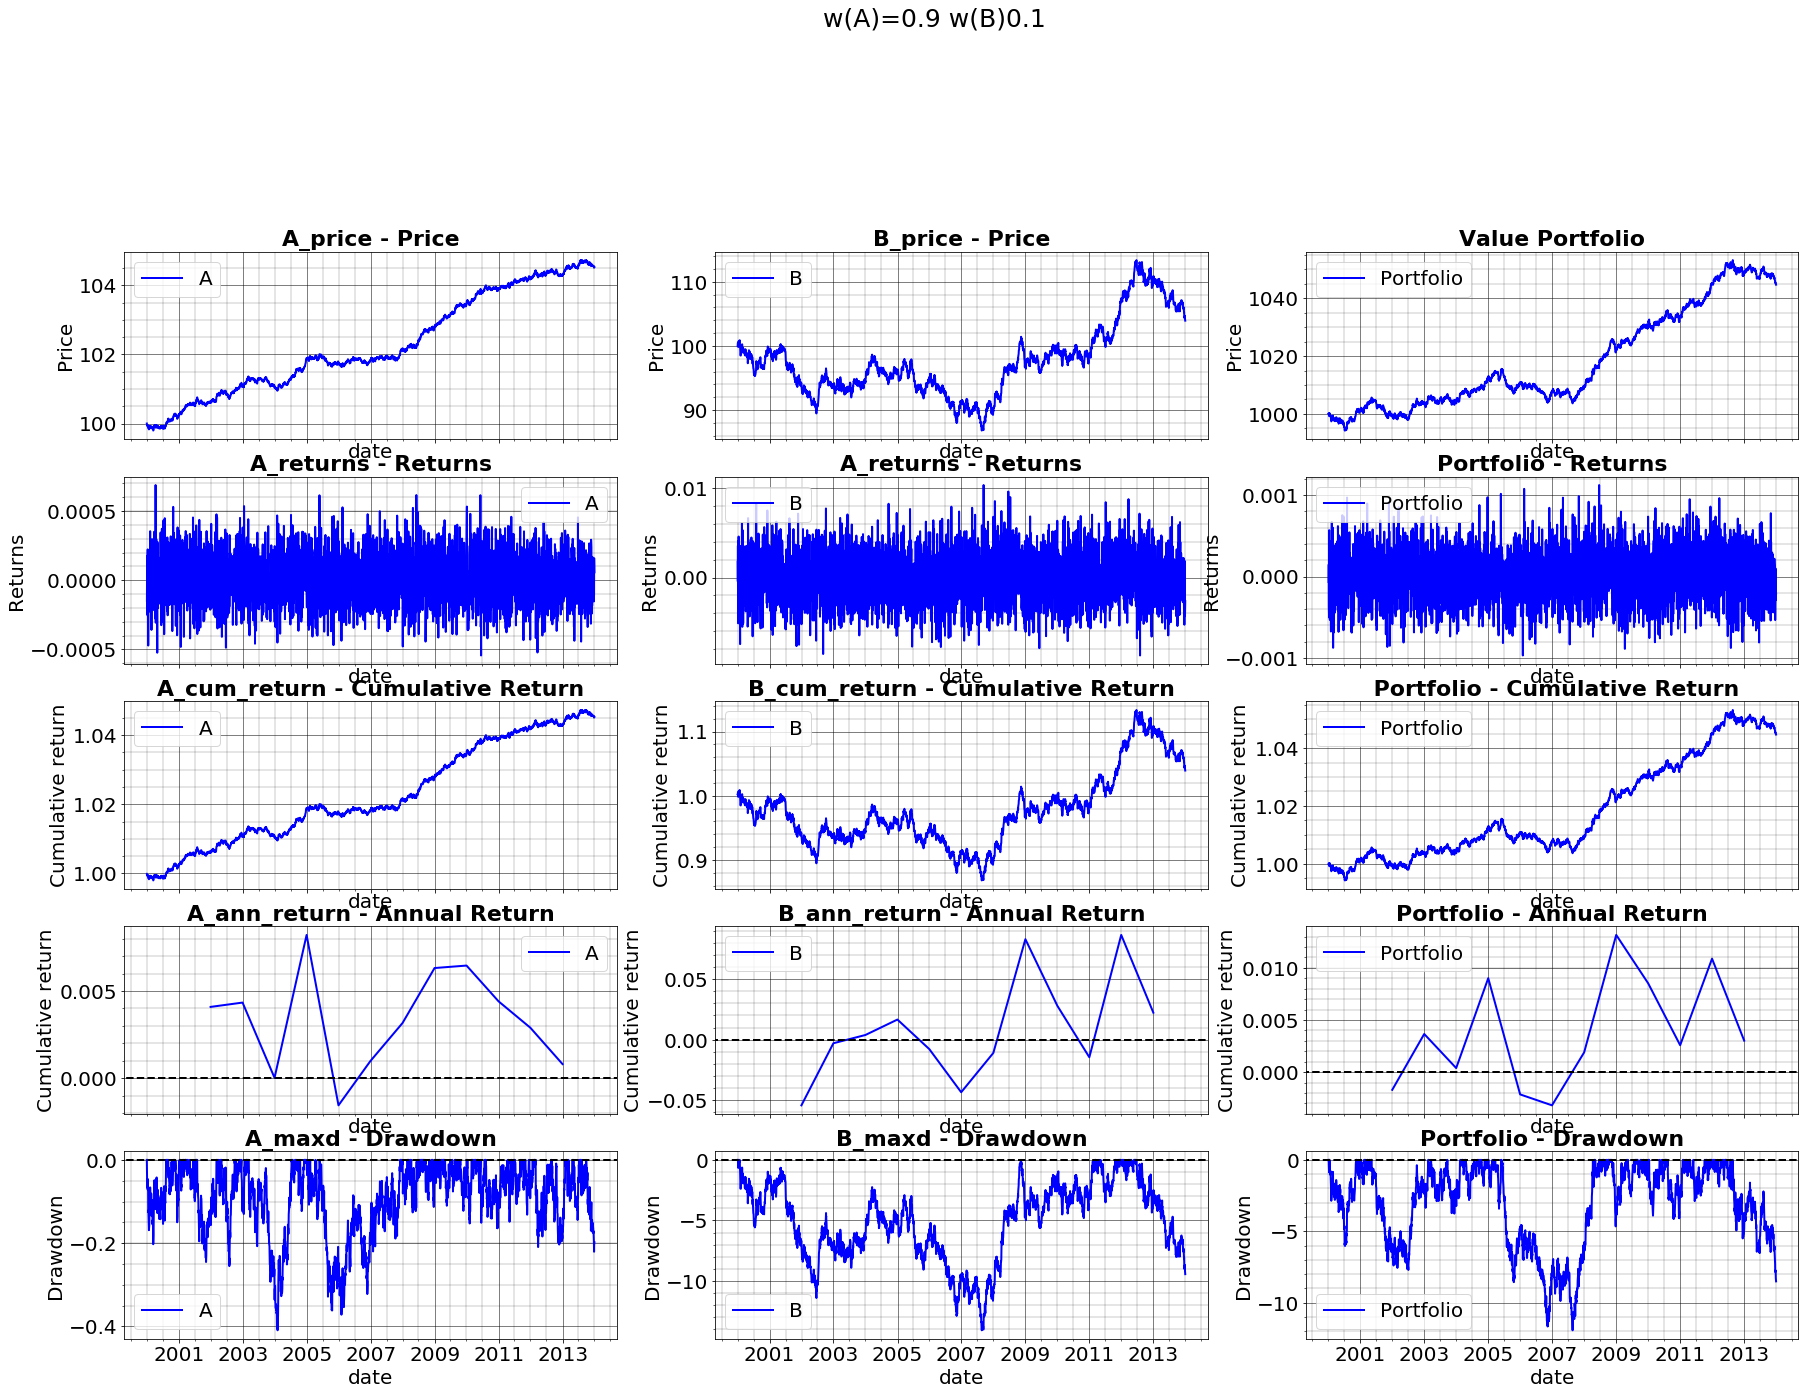

In [287]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5,3, sharex=True, figsize=(30,20))
f.suptitle("w(A)="+str(w_a)+" w(B)"+str(w_b),y=1.05, fontsize=25) #  "2018 - 07 - 11"

ax1[0].plot(prices["A_price"],color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[0].set_xlabel('date' ,fontsize=20)
ax1[0].set_ylabel('Price' ,fontsize=20)
ax1[0].set_title( prices["A_price"].name+' - Price',fontsize=22, fontweight='bold')
ax1[0].tick_params(labelsize = 20)
ax1[0].legend( fontsize=20,loc='best')#shadow=True,
ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[0].minorticks_on()

ax1[1].plot(prices["B_price"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[1].set_xlabel('date' ,fontsize=20)
ax1[1].set_ylabel('Price' ,fontsize=20)
ax1[1].set_title( prices["B_price"].name+' - Price',fontsize=22, fontweight='bold')
ax1[1].tick_params(labelsize = 20)
ax1[1].legend( fontsize=20,loc='best')#shadow=True,
ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[1].minorticks_on()

ax1[2].plot(prices["Portfolio_evolution"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[2].set_xlabel('date' ,fontsize=20)
ax1[2].set_ylabel('Price' ,fontsize=20)
ax1[2].set_title('Value Portfolio',fontsize=22, fontweight='bold')
ax1[2].tick_params(labelsize = 20)
ax1[2].legend( fontsize=20,loc='best')#shadow=True,
ax1[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[2].minorticks_on()

ax2[0].plot(prices["A_returns"],color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[0].set_xlabel('date' ,fontsize=20)
ax2[0].set_ylabel('Returns' ,fontsize=20)
ax2[0].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
ax2[0].tick_params(labelsize = 20)
ax2[0].legend( fontsize=20,loc='best')#shadow=True,
ax2[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[0].minorticks_on()

ax2[1].plot(prices["B_returns"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[1].set_xlabel('date' ,fontsize=20)
ax2[1].set_ylabel('Returns' ,fontsize=20)
ax2[1].set_title( prices["A_returns"].name+' - Returns',fontsize=22, fontweight='bold')
ax2[1].tick_params(labelsize = 20)
ax2[1].legend( fontsize=20,loc='best')#shadow=True,
ax2[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[1].minorticks_on()

ax2[2].plot(prices["Port_returns"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[2].set_xlabel('date' ,fontsize=20)
ax2[2].set_ylabel('Returns' ,fontsize=20)
ax2[2].set_title( 'Portfolio - Returns',fontsize=22, fontweight='bold')
ax2[2].tick_params(labelsize = 20)
ax2[2].legend( fontsize=20,loc='best')#shadow=True,
ax2[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[2].minorticks_on()


ax3[0].plot(prices["A_cum_return"],color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[0].set_xlabel('date' ,fontsize=20)
ax3[0].set_ylabel('Cumulative return' ,fontsize=20)
ax3[0].set_title( prices["A_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[0].tick_params(labelsize = 20)
ax3[0].legend( fontsize=20,loc='best')#shadow=True,
ax3[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[0].minorticks_on()

ax3[1].plot(prices["B_cum_return"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[1].set_xlabel('date' ,fontsize=20)
ax3[1].set_ylabel('Cumulative return' ,fontsize=20)
ax3[1].set_title( prices["B_cum_return"].name+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[1].tick_params(labelsize = 20)
ax3[1].legend( fontsize=20,loc='best')#shadow=True,
ax3[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[1].minorticks_on()

ax3[2].plot(prices["Port_cum_return"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[2].set_xlabel('date' ,fontsize=20)
ax3[2].set_ylabel('Cumulative return' ,fontsize=20)
ax3[2].set_title( ' Portfolio - Cumulative Return',fontsize=22, fontweight='bold')
ax3[2].tick_params(labelsize = 20)
ax3[2].legend( fontsize=20,loc='best')#shadow=True,
ax3[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[2].minorticks_on()

ax4[0].plot(prices["A_ann_return"].dropna(),color="b",label="A",lw=2)#import matplotlib as mpl
ax4[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[0].set_xlabel('date' ,fontsize=20)
ax4[0].set_ylabel('Cumulative return' ,fontsize=20)
ax4[0].set_title( prices["A_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
ax4[0].tick_params(labelsize = 20)
ax4[0].legend( fontsize=20,loc='best')#shadow=True,
ax4[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[0].minorticks_on()

ax4[1].plot(prices["B_ann_return"].dropna(),color="b",label="B",lw=2)#import matplotlib as mpl
ax4[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[1].set_xlabel('date' ,fontsize=20)
ax4[1].set_ylabel('Cumulative return' ,fontsize=20)
ax4[1].set_title(prices["B_ann_return"].name+' - Annual Return',fontsize=22, fontweight='bold')
ax4[1].tick_params(labelsize = 20)
ax4[1].legend( fontsize=20,loc='best')#shadow=True,
ax4[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[1].minorticks_on()

ax4[2].plot(prices["Port_ann_return"].dropna(),color="b",label="Portfolio",lw=2)#import matplotlib as mpl
ax4[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[2].set_xlabel('date' ,fontsize=20)
ax4[2].set_ylabel('Cumulative return' ,fontsize=20)
ax4[2].set_title('Portfolio - Annual Return',fontsize=22, fontweight='bold')
ax4[2].tick_params(labelsize = 20)
ax4[2].legend( fontsize=20,loc='best')#shadow=True,
ax4[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[2].minorticks_on()


ax5[0].plot(prices["A_maxd"],color="b",label="A",lw=2)#import matplotlib as mpl
ax5[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[0].set_xlabel('date' ,fontsize=20)
ax5[0].set_ylabel('Drawdown' ,fontsize=20)
ax5[0].set_title( prices["A_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
ax5[0].tick_params(labelsize = 20)
ax5[0].legend( fontsize=20,loc='best')#shadow=True,
ax5[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[0].minorticks_on()

ax5[1].plot(prices["B_maxd"],color="b",label="B",lw=2)#import matplotlib as mpl
ax5[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[1].set_xlabel('date' ,fontsize=20)
ax5[1].set_ylabel('Drawdown' ,fontsize=20)
ax5[1].set_title(prices["B_maxd"].name+' - Drawdown',fontsize=22, fontweight='bold')
ax5[1].tick_params(labelsize = 20)
ax5[1].legend( fontsize=20,loc='best')#shadow=True,
ax5[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[1].minorticks_on()

ax5[2].plot(prices["Port_maxd"],color="b",label="Portfolio",lw=2)#import matplotlib as mpl
ax5[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[2].set_xlabel('date' ,fontsize=20)
ax5[2].set_ylabel('Drawdown' ,fontsize=20)
ax5[2].set_title('Portfolio - Drawdown',fontsize=22, fontweight='bold')
ax5[2].tick_params(labelsize = 20)
ax5[2].legend( fontsize=20,loc='best')#shadow=True,
ax5[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[2].minorticks_on()

In [271]:
'''prices_filter=(prices.pct_change()+1).cumprod() #asfreq('BMS')
prices_filter["A_wa"]=prices_filter["A_price"]*w_a
prices_filter["B_wb"]=prices_filter["B_price"]*w_b
prices_filter["I_Awa_Bwb"]=(prices_filter["A_wa"]+prices_filter["B_wb"])*I
prices_filter.head()

portfolio=pd.DataFrame(prices_filter["I_Awa_Bwb"])
portfolio.columns=["Portfolio"]

returns_port=get_return(portfolio)
cum_returns_port = get_return_cum(portfolio)
annual_ret_port=get_return_annual(portfolio)
Roll_Max_port=get_roll_drawdown(portfolio.dropna())'''

'prices_filter=(prices.pct_change()+1).cumprod() #asfreq(\'BMS\')\nprices_filter["A_wa"]=prices_filter["A_price"]*w_a\nprices_filter["B_wb"]=prices_filter["B_price"]*w_b\nprices_filter["I_Awa_Bwb"]=(prices_filter["A_wa"]+prices_filter["B_wb"])*I\nprices_filter.head()\n\nportfolio=pd.DataFrame(prices_filter["I_Awa_Bwb"])\nportfolio.columns=["Portfolio"]\n\nreturns_port=get_return(portfolio)\ncum_returns_port = get_return_cum(portfolio)\nannual_ret_port=get_return_annual(portfolio)\nRoll_Max_port=get_roll_drawdown(portfolio.dropna())'

In [114]:
#Roll_Max_port

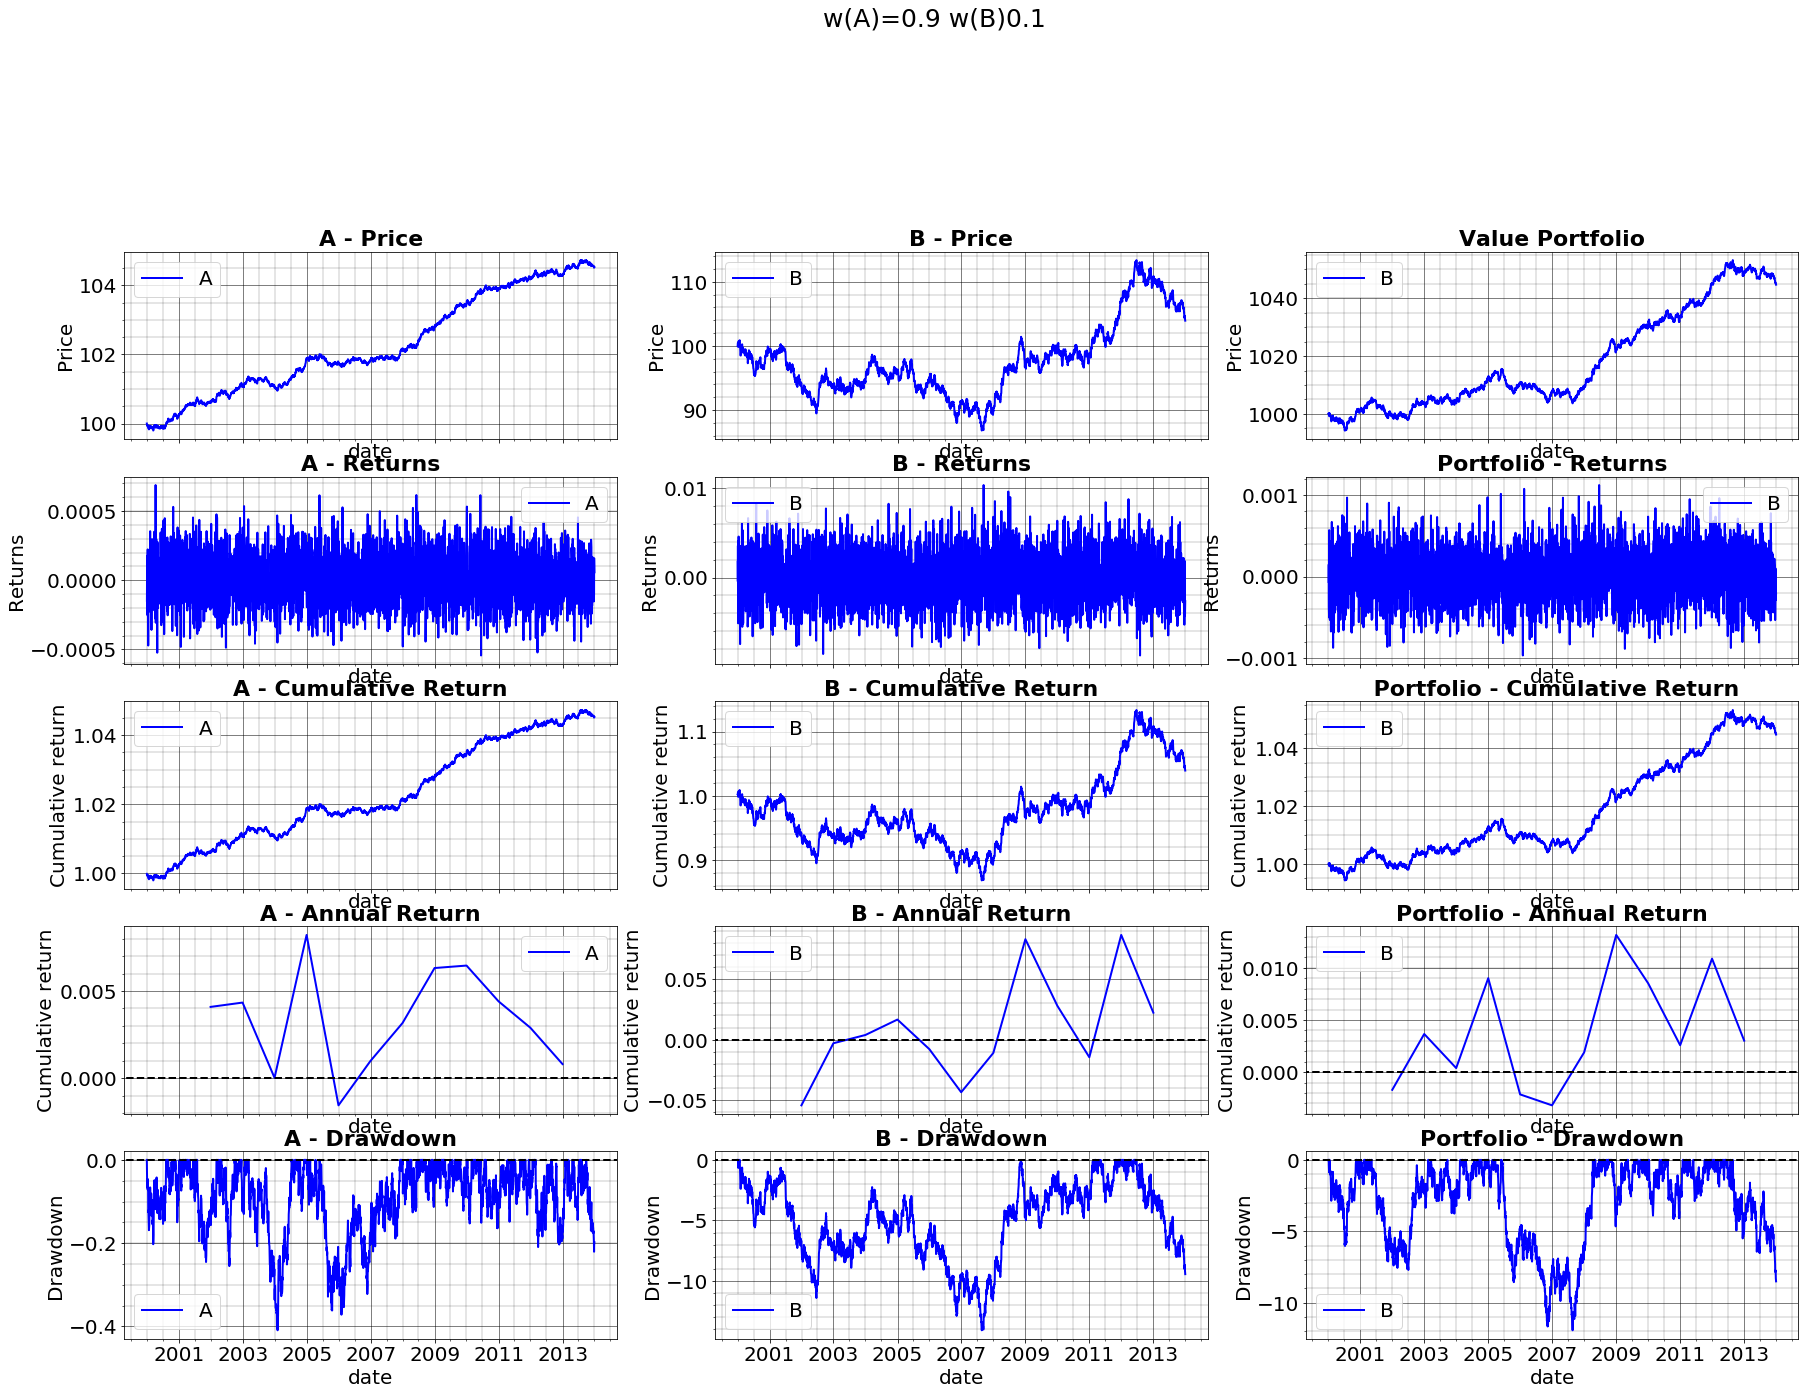

In [138]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5,3, sharex=True, figsize=(30,20))
f.suptitle("w(A)="+str(w_a)+" w(B)"+str(w_b),y=1.05, fontsize=25) #  "2018 - 07 - 11"

ax1[0].plot(instrument_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[0].set_xlabel('date' ,fontsize=20)
ax1[0].set_ylabel('Price' ,fontsize=20)
ax1[0].set_title( instrument_A.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[0].tick_params(labelsize = 20)
ax1[0].legend( fontsize=20,loc='best')#shadow=True,
ax1[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[0].minorticks_on()

ax1[1].plot(instrument_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[1].set_xlabel('date' ,fontsize=20)
ax1[1].set_ylabel('Price' ,fontsize=20)
ax1[1].set_title( instrument_B.columns[0]+' - Price',fontsize=22, fontweight='bold')
ax1[1].tick_params(labelsize = 20)
ax1[1].legend( fontsize=20,loc='best')#shadow=True,
ax1[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[1].minorticks_on()

ax1[2].plot(port["total"],color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax1[2].set_xlabel('date' ,fontsize=20)
ax1[2].set_ylabel('Price' ,fontsize=20)
ax1[2].set_title('Value Portfolio',fontsize=22, fontweight='bold')
ax1[2].tick_params(labelsize = 20)
ax1[2].legend( fontsize=20,loc='best')#shadow=True,
ax1[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax1[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax1[2].minorticks_on()

ax2[0].plot(returns_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[0].set_xlabel('date' ,fontsize=20)
ax2[0].set_ylabel('Returns' ,fontsize=20)
ax2[0].set_title( returns_A.columns[0]+' - Returns',fontsize=22, fontweight='bold')
ax2[0].tick_params(labelsize = 20)
ax2[0].legend( fontsize=20,loc='best')#shadow=True,
ax2[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[0].minorticks_on()

ax2[1].plot(returns_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[1].set_xlabel('date' ,fontsize=20)
ax2[1].set_ylabel('Returns' ,fontsize=20)
ax2[1].set_title( returns_B.columns[0]+' - Returns',fontsize=22, fontweight='bold')
ax2[1].tick_params(labelsize = 20)
ax2[1].legend( fontsize=20,loc='best')#shadow=True,
ax2[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[1].minorticks_on()

ax2[2].plot(returns_port,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax2[2].set_xlabel('date' ,fontsize=20)
ax2[2].set_ylabel('Returns' ,fontsize=20)
ax2[2].set_title( 'Portfolio - Returns',fontsize=22, fontweight='bold')
ax2[2].tick_params(labelsize = 20)
ax2[2].legend( fontsize=20,loc='best')#shadow=True,
ax2[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax2[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax2[2].minorticks_on()


ax3[0].plot(cum_returns_A,color="b",label="A",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[0].set_xlabel('date' ,fontsize=20)
ax3[0].set_ylabel('Cumulative return' ,fontsize=20)
ax3[0].set_title( cum_returns_A.columns[0]+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[0].tick_params(labelsize = 20)
ax3[0].legend( fontsize=20,loc='best')#shadow=True,
ax3[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[0].minorticks_on()

ax3[1].plot(cum_returns_B,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[1].set_xlabel('date' ,fontsize=20)
ax3[1].set_ylabel('Cumulative return' ,fontsize=20)
ax3[1].set_title( cum_returns_B.columns[0]+' - Cumulative Return',fontsize=22, fontweight='bold')
ax3[1].tick_params(labelsize = 20)
ax3[1].legend( fontsize=20,loc='best')#shadow=True,
ax3[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[1].minorticks_on()

ax3[2].plot(cum_returns_port,color="b",label="B",lw=2)#import matplotlib as mpl
#ax1.axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax3[2].set_xlabel('date' ,fontsize=20)
ax3[2].set_ylabel('Cumulative return' ,fontsize=20)
ax3[2].set_title( ' Portfolio - Cumulative Return',fontsize=22, fontweight='bold')
ax3[2].tick_params(labelsize = 20)
ax3[2].legend( fontsize=20,loc='best')#shadow=True,
ax3[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax3[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax3[2].minorticks_on()

ax4[0].plot(annual_ret_A,color="b",label="A",lw=2)#import matplotlib as mpl
ax4[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[0].set_xlabel('date' ,fontsize=20)
ax4[0].set_ylabel('Cumulative return' ,fontsize=20)
ax4[0].set_title( annual_ret_A.columns[0]+' - Annual Return',fontsize=22, fontweight='bold')
ax4[0].tick_params(labelsize = 20)
ax4[0].legend( fontsize=20,loc='best')#shadow=True,
ax4[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[0].minorticks_on()

ax4[1].plot(annual_ret_B,color="b",label="B",lw=2)#import matplotlib as mpl
ax4[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[1].set_xlabel('date' ,fontsize=20)
ax4[1].set_ylabel('Cumulative return' ,fontsize=20)
ax4[1].set_title(annual_ret_B.columns[0]+' - Annual Return',fontsize=22, fontweight='bold')
ax4[1].tick_params(labelsize = 20)
ax4[1].legend( fontsize=20,loc='best')#shadow=True,
ax4[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[1].minorticks_on()

ax4[2].plot(annual_ret_port,color="b",label="B",lw=2)#import matplotlib as mpl
ax4[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax4[2].set_xlabel('date' ,fontsize=20)
ax4[2].set_ylabel('Cumulative return' ,fontsize=20)
ax4[2].set_title('Portfolio - Annual Return',fontsize=22, fontweight='bold')
ax4[2].tick_params(labelsize = 20)
ax4[2].legend( fontsize=20,loc='best')#shadow=True,
ax4[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax4[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax4[2].minorticks_on()


ax5[0].plot(Roll_Max_A,color="b",label="A",lw=2)#import matplotlib as mpl
ax5[0].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[0].set_xlabel('date' ,fontsize=20)
ax5[0].set_ylabel('Drawdown' ,fontsize=20)
ax5[0].set_title( Roll_Max_A.columns[0]+' - Drawdown',fontsize=22, fontweight='bold')
ax5[0].tick_params(labelsize = 20)
ax5[0].legend( fontsize=20,loc='best')#shadow=True,
ax5[0].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[0].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[0].minorticks_on()

ax5[1].plot(Roll_Max_B,color="b",label="B",lw=2)#import matplotlib as mpl
ax5[1].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[1].set_xlabel('date' ,fontsize=20)
ax5[1].set_ylabel('Drawdown' ,fontsize=20)
ax5[1].set_title(Roll_Max_B.columns[0]+' - Drawdown',fontsize=22, fontweight='bold')
ax5[1].tick_params(labelsize = 20)
ax5[1].legend( fontsize=20,loc='best')#shadow=True,
ax5[1].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[1].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[1].minorticks_on()

ax5[2].plot(Roll_Max_port,color="b",label="B",lw=2)#import matplotlib as mpl
ax5[2].axhline(y=0, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)
ax5[2].set_xlabel('date' ,fontsize=20)
ax5[2].set_ylabel('Drawdown' ,fontsize=20)
ax5[2].set_title('Portfolio - Drawdown',fontsize=22, fontweight='bold')
ax5[2].tick_params(labelsize = 20)
ax5[2].legend( fontsize=20,loc='best')#shadow=True,
ax5[2].grid(b=True, which='major', color='k', linestyle='-', linewidth=0.5)
ax5[2].grid(b=True, which='minor', color='k', linestyle='-', linewidth=0.2)
ax5[2].minorticks_on()

In [51]:
instrument_A.values

array([[100.        ],
       [ 99.98521492],
       [ 99.98259288],
       ...,
       [104.50966319],
       [104.52630785],
       [104.53230628]])

In [62]:
max_,i,j=max_drawdown(instrument_A.values)
max_

array([-0.00403806])

No handles with labels found to put in legend.


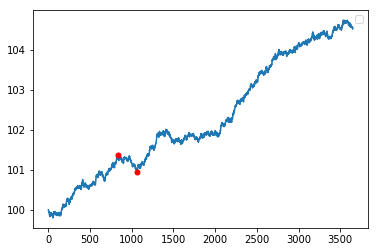

In [59]:
plot_max_drawdown(instrument_A.values)

In [64]:
Roll_Max = pd.rolling_max(instrument_A['A'], window, min_periods=1)
Daily_Drawdown = instrument_A['A']/Roll_Max - 1.0

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252,min_periods=1).max()
  """Entry point for launching an IPython kernel.


In [60]:
#instrument_A.tail()
instrument_A.values[i], instrument_A.values[j]

(array([101.36389387]), array([100.95458077]))

In [68]:
Roll_Max

2000-01-03    100.000000
2000-01-04    100.000000
2000-01-05    100.000000
2000-01-06    100.000000
2000-01-07    100.000000
2000-01-10    100.000000
2000-01-11    100.000000
2000-01-12    100.000000
2000-01-13    100.000000
2000-01-14    100.000000
2000-01-17    100.000000
2000-01-18    100.000000
2000-01-19    100.000000
2000-01-20    100.000000
2000-01-21    100.000000
2000-01-24    100.000000
2000-01-25    100.000000
2000-01-26    100.000000
2000-01-27    100.000000
2000-01-28    100.000000
2000-01-31    100.000000
2000-02-01    100.000000
2000-02-02    100.000000
2000-02-03    100.000000
2000-02-04    100.000000
2000-02-07    100.000000
2000-02-08    100.000000
2000-02-09    100.000000
2000-02-10    100.000000
2000-02-11    100.000000
                 ...    
2013-11-19    104.730295
2013-11-20    104.730295
2013-11-21    104.730295
2013-11-22    104.730295
2013-11-25    104.730295
2013-11-26    104.730295
2013-11-27    104.730295
2013-11-28    104.730295
2013-11-29    104.730295


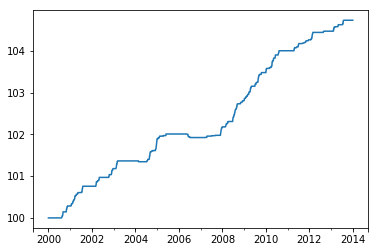

In [69]:
Roll_Max.plot()

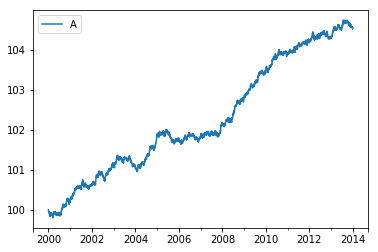

In [71]:
instrument_A.plot()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252,min_periods=1).max()
  
/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_min is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252,min_periods=1).min()
  # This is added back by InteractiveShellApp.init_path()


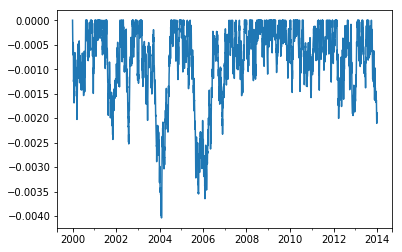

In [67]:
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = pd.rolling_max(instrument_A['A'], window, min_periods=1)
Daily_Drawdown = instrument_A['A']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = pd.rolling_min(Daily_Drawdown, window, min_periods=1)

# Plot the results
Daily_Drawdown.plot()
#Max_Daily_Drawdown.plot()
plt.show()

In [49]:
# calculates max drawdown, largest reduction from highest point
def max_drawdown(xs):
    i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    j = np.argmax(xs[:i]) # start of period
    pct_mdd = -1 * ((xs[j] - xs[i]) / xs[j])
    return pct_mdd, j, i

# plots max drawdown chart
def plot_max_drawdown(xs):
    _, j, i = max_drawdown(xs)
    plt.plot(xs)
    plt.legend()
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=5)


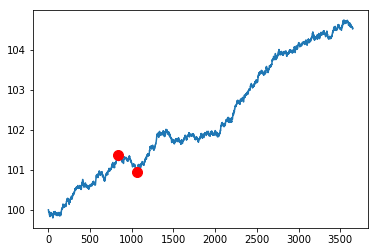

In [83]:
i = np.argmax(np.maximum.accumulate(instrument_A.values) - instrument_A.values) # end of the period
j = np.argmax(instrument_A.values[:i]) # start of period
plt.plot(instrument_A.values-np.maximum.accumulate(instrument_A.values))

plt.plot(instrument_A.values)
plt.plot([i, j], [instrument_A.values[i],instrument_A.values[j]], 'o', color='Red', markersize=10)

In [87]:
#plt.plot(np.maximum.accumulate(instrument_A.values))

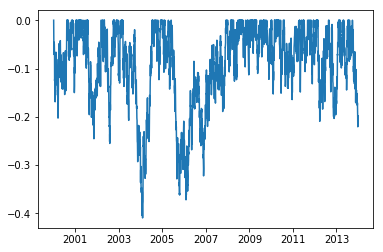

In [88]:
plt.plot(instrument_A.index,instrument_A.values-np.maximum.accumulate(instrument_A.values))

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = 100 #starting stock price (i.e. last available real stock price)
T = 100 #Number of trading days
mu = 0.04 #Return
vol = 0.01 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = 100 #starting stock price (i.e. last available real stock price)
T = 100 #Number of trading days
mu = 0.09 #Return
vol = 0.16 #Volatility
 
#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

In [ ]:
np.sqrt(1+.16*16)

In [ ]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu = 0.09 #Return
vol = .16#np.sqrt(1+.16*16) #Volatility

#set up empty list to hold our ending values for each simulated price series
result = []
 
#Define Variables
 
#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):#10000
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    #df=pd.Series(daily_returns)
    #plt.plot(((df).cumprod() - 1))
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
 
#show the plot of multiple price series created above
plt.show()
 
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [ ]:
n_años=10
S = 100 #starting stock price (i.e. last available real stock price)
T = 365*n_años #Number of trading days
mu1 = 0.09 #Return
vol1 = .16#np.sqrt(1+.16*16) #Volatility
mu2 = 0.04 #Return
vol2 = .01#np.sqrt(1+.16*16) #Volatility

#set up empty list to hold our ending values for each simulated price series
result = []
 
#Define Variables
 
#choose number of runs to simulate - I have chosen 10,000
for i in range(1000):#10000
    #create list of daily returns using random normal distribution
    daily_returns1=np.random.normal(mu1/T,vol1/math.sqrt(T),T)+1
    daily_returns2=np.random.normal(mu2/T,vol2/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    #price_list = [S*2]
    price_list1 = [S]
    price_list2 = [S]
    
    for x in daily_returns1:
        price_list1.append(price_list1[-1]*x)
        
    for y in daily_returns2:
        price_list2.append(price_list2[-1]*y)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list1+price_list2)
    #df=pd.Series(daily_returns)
    #plt.plot(((df).cumprod() - 1))
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list1[-1]+price_list2[-1])
 
#show the plot of multiple price series created above
plt.show()
 
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [ ]:
plt.plot(daily_returns)

In [ ]:
import pandas as pd
df=pd.Series(daily_returns)
((df).cumprod() - 1).head()

In [ ]:
df.head()

In [ ]:
((df).cumprod() - 1).plot()

In [ ]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

In [ ]:
print("5% quantile =",np.percentile(result,5)) # 5% de probabilidad de que el precio termine por debajo de 102.33
print("95% quantile =",np.percentile(result,95)) # 5% de probabilidad de que termine por arriba de 105.80

In [ ]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()